# MOBILE USAGE PATTERN

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("finalcleaned.csv")

## The Dataset Contains Data about Gender, Age Group, Primary Device manufacturer, Screen on Time, etc. Data is collected via Google Forms, I got volunteers who helped me to fill this https://forms.gle/4YCaj3PgoUnRAoSH6 Google form from Reddit, Whatsapp and Public Gathering, where I was present.


In [3]:
df

,Name,Gender,Age,Profession,Phone Brand,Secondphone,Using Since,Primary SIM,SOT,Social Media,Connection,Browser,Subscription
0,Vishal,Male,18 to 24,Student,Motorola,Yes,2yrs,Airtel,5 to 6 Hrs,Reddit,Both,Chrome,500
1,himanshu,Male,18 to 24,Student,Realme,No,3yrs,Jio,5 to 6 Hrs,Instagram,Data,Chrome,0
2,Aditya,Male,18 to 24,Student,Apple,Yes,2yrs,Jio,5 to 6 Hrs,Instagram,Data,Safari,500
3,Rishi,Male,18 to 24,Student,Apple,Yes,1yr,Airtel,3 to 4 Hrs,Reddit,Both,Safari,500
4,Ananta,Male,18 to 24,Professional,Samsung,No,4yrs,Airtel,5 to 6 Hrs,Whatsapp,Data,Chrome,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Vishal,Male,35 to 44,Professional,Nothing,No,2yrs,Jio,5 to 6 Hrs,Reddit,Both,Chrome,500
125,Adarsh,Male,18 to 24,Business,Realme,No,3yrs,Airtel,7 to 8 Hrs,Instagram,Data,Chrome,0
126,sojwal,Male,18 to 24,Student,Apple,No,1yr,Jio,3 to 4 Hrs,Reddit,Both,Safari,0
127,Sejal,Female,18 to 24,Student,Vivo,No,2yrs,Jio,1 to 2 Hrs,Signal,Data,Chrome,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          129 non-null    object
 1   Gender        129 non-null    object
 2   Age           129 non-null    object
 3   Profession    129 non-null    object
 4   Phone Brand   129 non-null    object
 5   Secondphone   126 non-null    object
 6   Using Since   129 non-null    object
 7   Primary SIM   125 non-null    object
 8   SOT           129 non-null    object
 9   Social Media  129 non-null    object
 10  Connection    129 non-null    object
 11  Browser       128 non-null    object
 12  Subscription  129 non-null    int64 
dtypes: int64(1), object(12)
memory usage: 13.2+ KB


In [5]:
df.describe()

,Subscription
count,129.000000
mean,104.651163
std,239.420024
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1000.000000


Let us check for Duplicate values

In [6]:
df[df.duplicated()]

,Name,Gender,Age,Profession,Phone Brand,Secondphone,Using Since,Primary SIM,SOT,Social Media,Connection,Browser,Subscription


Let us check for number of unique values
As we got 119 uniques values in names which is of no use for us so let's delete name columns

In [7]:
df = df.drop('Name', axis=1)

In [8]:
df.nunique()  

Gender           2
Age              5
Profession       7
Phone Brand     10
Secondphone      2
Using Since      6
Primary SIM      4
SOT              5
Social Media     6
Connection       3
Browser          5
Subscription     3
dtype: int64

Let us check for what are the different professions available in entry

In [9]:
df["Profession"].unique()

array(['Student', 'Professional', 'Self-Emp', 'Worker', 'Business',
       'Homemaker', 'Government Servant'], dtype=object)

let us count values of profession value

In [10]:
df["Phone Brand"].value_counts()   

Phone Brand
Xiaomi      27
Apple       20
Samsung     19
Vivo        15
Realme      14
Motorola     8
Oneplus      8
Nothing      8
Oppo         7
Google       3
Name: count, dtype: int64

In [11]:
df["Gender"].value_counts()

Gender
Male      78
Female    51
Name: count, dtype: int64

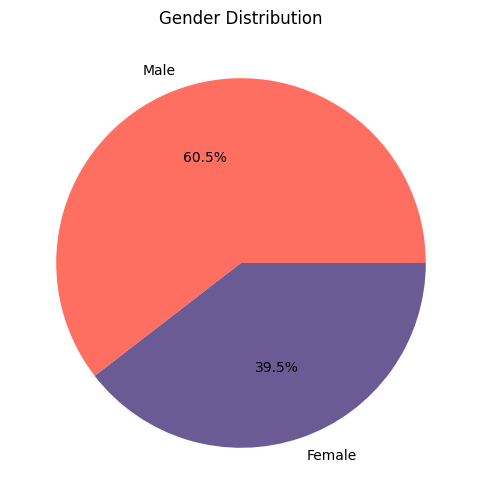

In [23]:
gender_counts = df["Gender"].value_counts()
colors = ["#FF6F61","#6B5B95","#88B04B","#FFA07A","#45B8AC","#EFC050","#D65076"]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=colors)
plt.title("Gender Distribution")

plt.show()


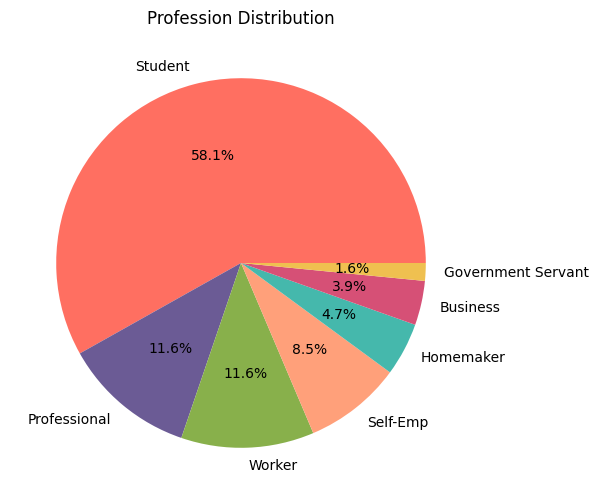

In [24]:
gender_counts = df["Profession"].value_counts()
colors = ["#FF6F61", "#6B5B95", "#88B04B", "#FFA07A", "#45B8AC", "#D65076", "#EFC050"]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=colors)
plt.title("Profession Distribution")

plt.show()


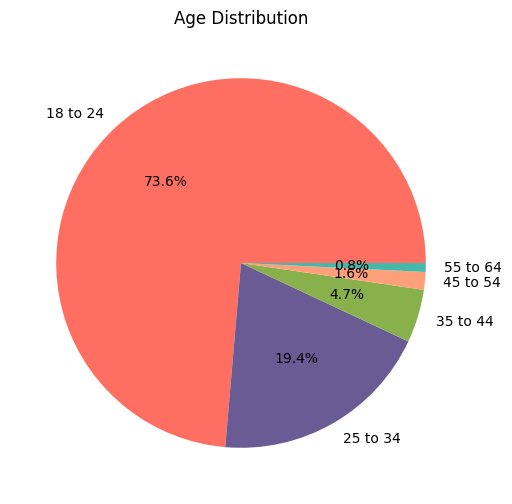

In [25]:
gender_counts = df["Age"].value_counts()
colors = ["#FF6F61", "#6B5B95", "#88B04B", "#FFA07A", "#45B8AC", "#D65076", "#EFC050"]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=colors)
plt.title("Age Distribution")

plt.show()


# Age Profession Bar Graph

<Axes: xlabel='Age'>

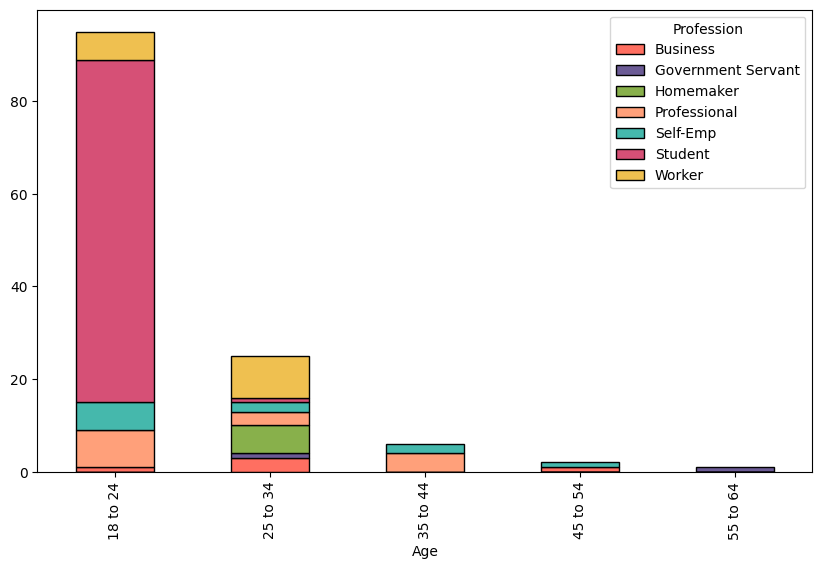

In [26]:
profage_counts = df.groupby(["Age", "Profession"]).size().unstack()
colors = ["#FF6F61","#6B5B95","#88B04B","#FFA07A","#45B8AC","#D65076","#EFC050"]
profage_counts.plot(kind="bar", stacked=True, figsize=(10, 6), color=colors,edgecolor="black")



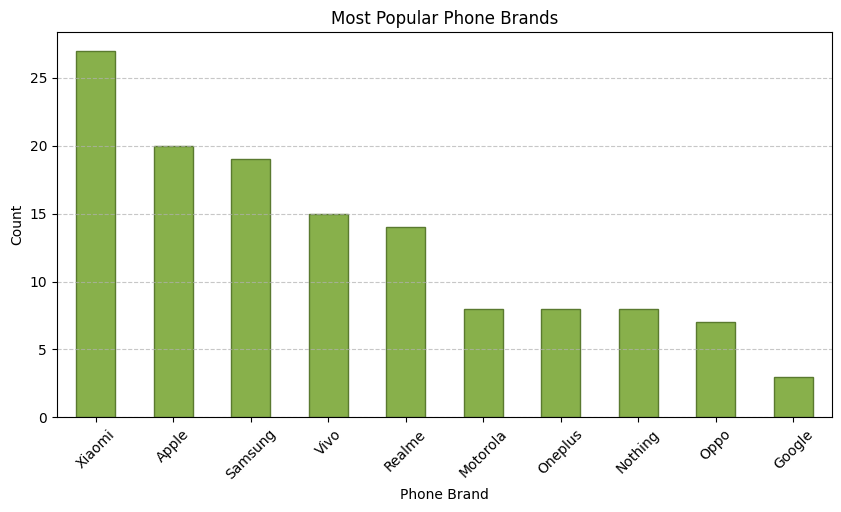

In [27]:
brand_counts = df["Phone Brand"].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 5))
brand_counts.plot(kind="bar", color="#88B04B",edgecolor="#5A7A2F")
plt.xlabel("Phone Brand")
plt.ylabel("Count")
plt.title("Most Popular Phone Brands")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


<Axes: xlabel='Phone Brand', ylabel='count'>

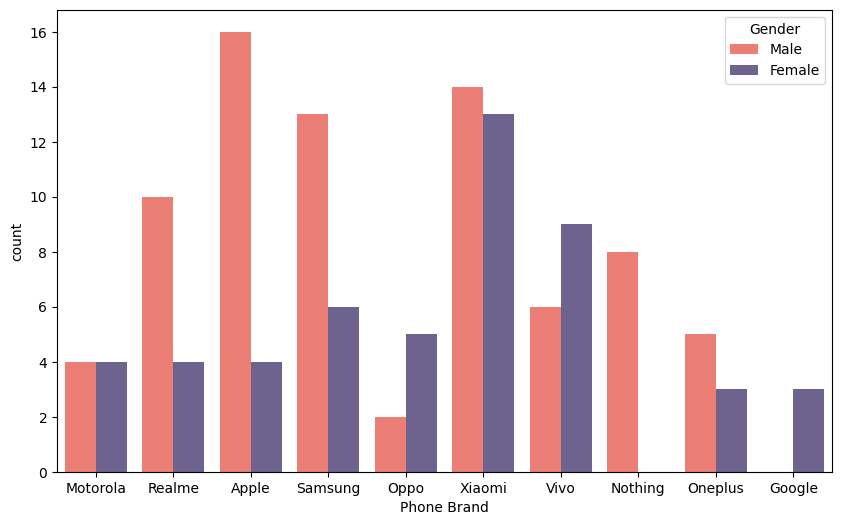

In [28]:
plt.figure(figsize=(10, 6))  # Adjust width & height
sns.countplot(df, x="Phone Brand", hue="Gender",palette={"Male":'#FF6F61', "Female":'#6B5B95'})

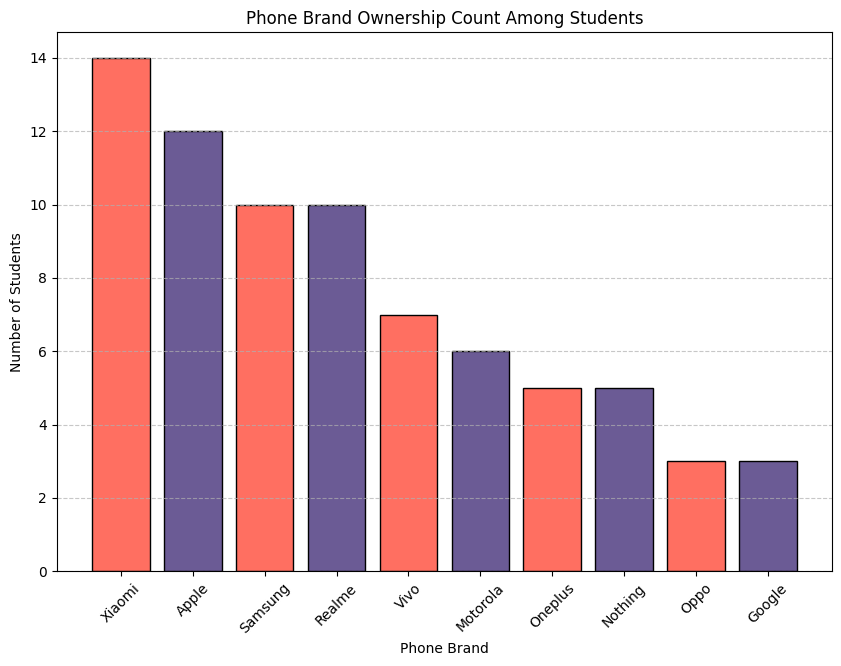

In [29]:
students_df=df[df["Profession"]=="Student"]
student_phone_brand = students_df["Phone Brand"].value_counts()
plt.figure(figsize=(10,7))


plt.bar(student_phone_brand.index, student_phone_brand.values, color=['#FF6F61', '#6B5B95'],edgecolor="black")
plt.xlabel("Phone Brand")
plt.xticks(rotation=45)
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.ylabel("Number of Students")
plt.title("Phone Brand Ownership Count Among Students")
plt.show()


# Screen On Time

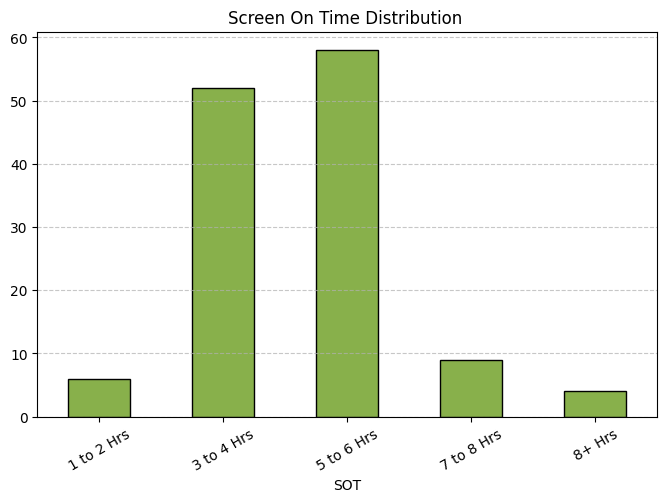

In [30]:
screentime= df["SOT"].value_counts()

# Sort categories in a meaningful order (optional: modify based on your dataset)
ordered = ["1 to 2 Hrs", "3 to 4 Hrs", "5 to 6 Hrs", "7 to 8 Hrs", "8+ Hrs"]
screentime= screentime.reindex(ordered)

# Plot bar chart
plt.figure(figsize=(8, 5))
screentime.plot(kind="bar", color="#88B04B", edgecolor="black")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Screen On Time Distribution ")
plt.xticks(rotation=30)
plt.show()

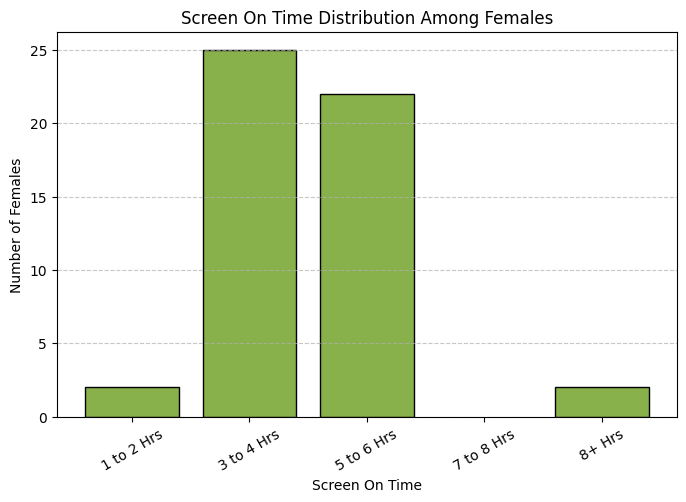

In [31]:
Women_df = df[df["Gender"] == "Female"]
fem_SOT = Women_df["SOT"].value_counts()
ordered = ["1 to 2 Hrs", "3 to 4 Hrs", "5 to 6 Hrs", "7 to 8 Hrs", "8+ Hrs"]
femSOT=fem_SOT.reindex(ordered)
plt.figure(figsize=(8,5))
plt.bar(femSOT.index, femSOT.values, color="#88B04B",edgecolor="black")
plt.xlabel("Screen On Time")
plt.ylabel("Number of Females")
plt.title("Screen On Time Distribution Among Females")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=30)
plt.show()


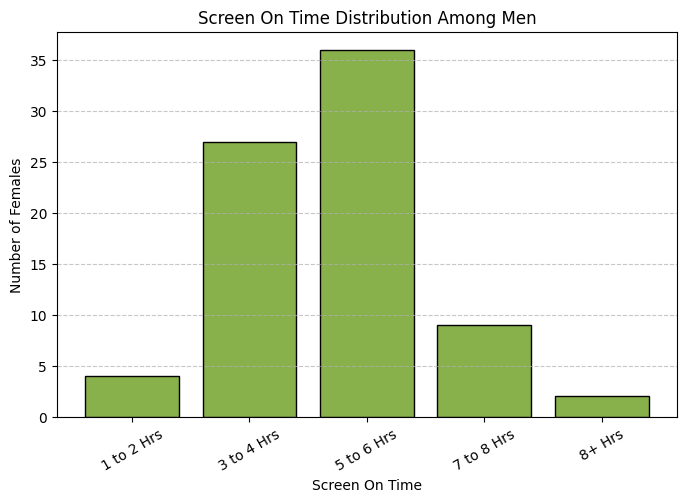

In [32]:
men_df = df[df["Gender"] == "Male"]
men_SOT = men_df["SOT"].value_counts()
ordered = ["1 to 2 Hrs", "3 to 4 Hrs", "5 to 6 Hrs", "7 to 8 Hrs", "8+ Hrs"]
menSOT=men_SOT.reindex(ordered)
plt.figure(figsize=(8,5))
plt.bar(menSOT.index, menSOT.values, color="#88B04B",edgecolor="black")
plt.xlabel("Screen On Time")
plt.ylabel("Number of Females")
plt.title("Screen On Time Distribution Among Men")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=30)
plt.show()


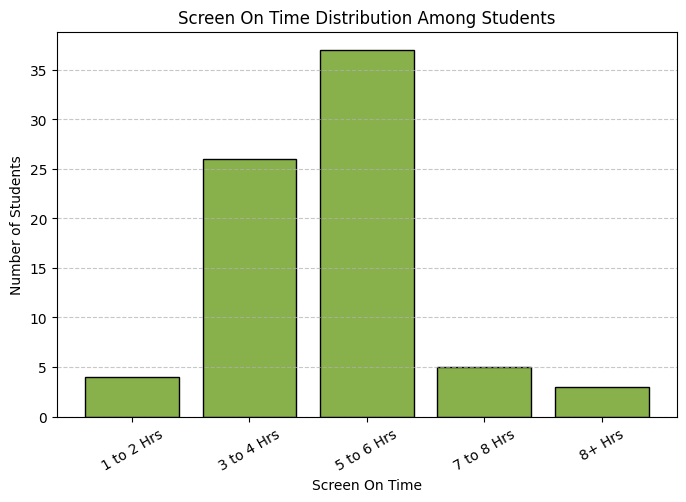

In [33]:
student_df = df[df["Profession"] == "Student"]
stud_SOT= student_df["SOT"].value_counts()
ordered = ["1 to 2 Hrs", "3 to 4 Hrs", "5 to 6 Hrs", "7 to 8 Hrs", "8+ Hrs"]
studSOT= stud_SOT.reindex(ordered)

plt.figure(figsize=(8,5))
plt.bar(studSOT.index,studSOT.values, color="#88B04B",edgecolor="black")
plt.xlabel("Screen On Time")
plt.ylabel("Number of Students")
plt.title("Screen On Time Distribution Among Students")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=30)
plt.show()


# Preffered Social Media Platform

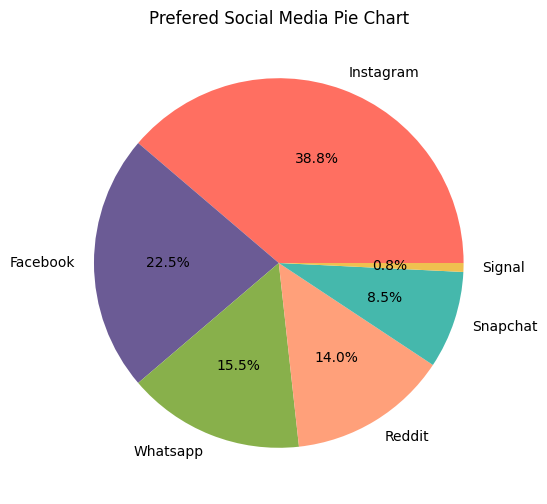

In [34]:
Socialmediacount = df["Social Media"].value_counts()
colors = ["#FF6F61","#6B5B95","#88B04B","#FFA07A","#45B8AC","#EFC050","#D65076"]

plt.figure(figsize=(6,6))
plt.pie(Socialmediacount, labels=Socialmediacount.index, autopct='%1.1f%%', colors=colors)
plt.title("Prefered Social Media Pie Chart")
plt.show()

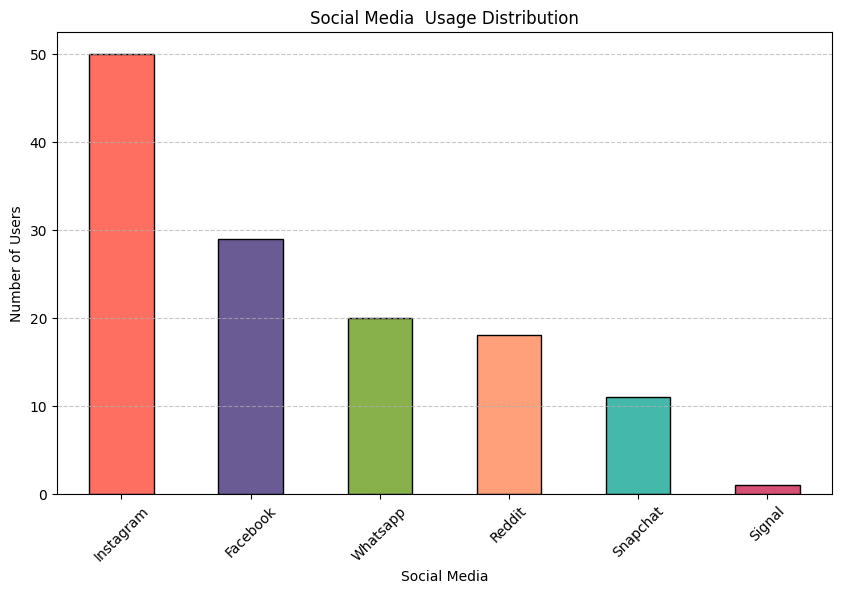

In [35]:
age_social_counts = df["Social Media"].value_counts()
colors = ["#FF6F61","#6B5B95","#88B04B","#FFA07A","#45B8AC","#D65076","#EFC050"]
age_social_counts.plot(kind="bar", figsize=(10, 6), color=colors,edgecolor="black")
plt.xlabel("Social Media")
plt.ylabel("Number of Users")
plt.title("Social Media  Usage Distribution")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Social Media Usage by Age Group

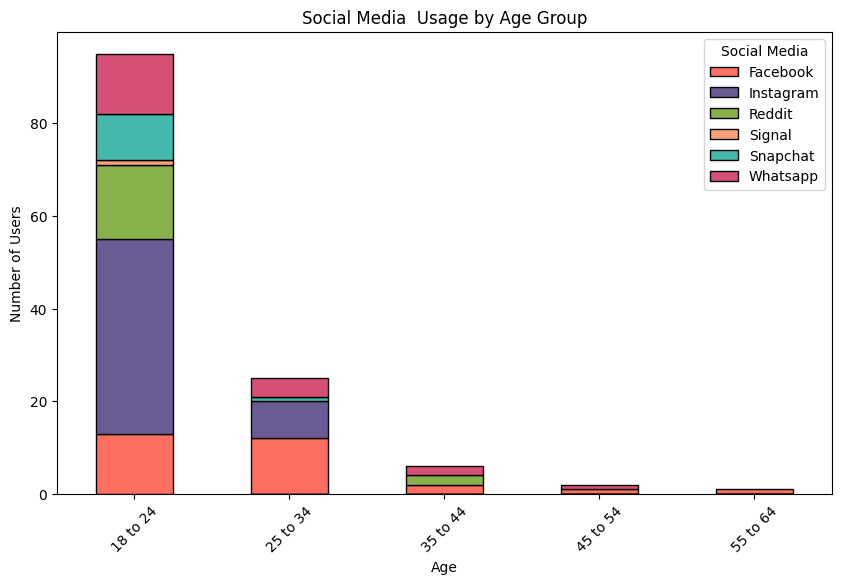

In [36]:
age_social_counts = df.groupby(["Age", "Social Media"]).size().unstack()
colors = ["#FF6F61","#6B5B95","#88B04B","#FFA07A","#45B8AC","#D65076","#EFC050"]
age_social_counts.plot(kind="bar", stacked=True, figsize=(10, 6), color=colors,edgecolor="black")
plt.ylabel("Number of Users")
plt.title("Social Media  Usage by Age Group")
plt.xticks(rotation=45)
plt.legend(title="Social Media")

plt.show()


## Most Used Social Media among Students

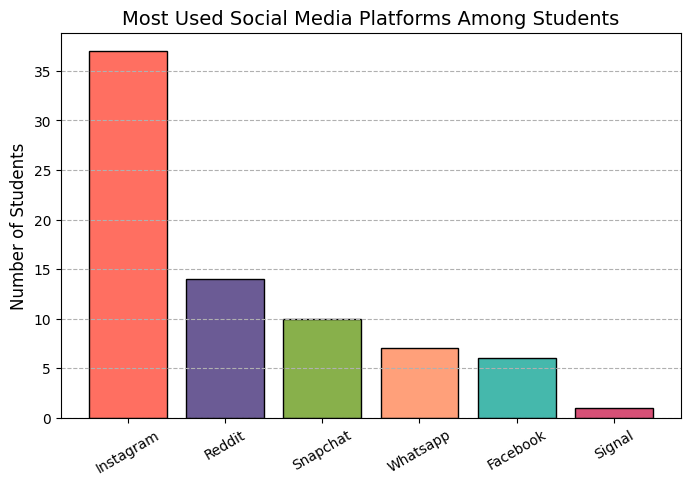

In [37]:
students_df = df[df["Profession"] == "Student"]
student_social_media_counts = students_df["Social Media"].value_counts()
colors = ["#FF6F61","#6B5B95","#88B04B","#FFA07A","#45B8AC","#D65076","#EFC050"]
plt.figure(figsize=(8,5))
plt.bar(student_social_media_counts.index, student_social_media_counts.values, color=colors,edgecolor="black")
plt.ylabel("Number of Students", fontsize=12)
plt.title("Most Used Social Media Platforms Among Students", fontsize=14)
plt.xticks(rotation=30, fontsize=10)
plt.grid(axis="y", linestyle="--")
plt.yticks(fontsize=10)
plt.show()


## Social Media Usage among Women

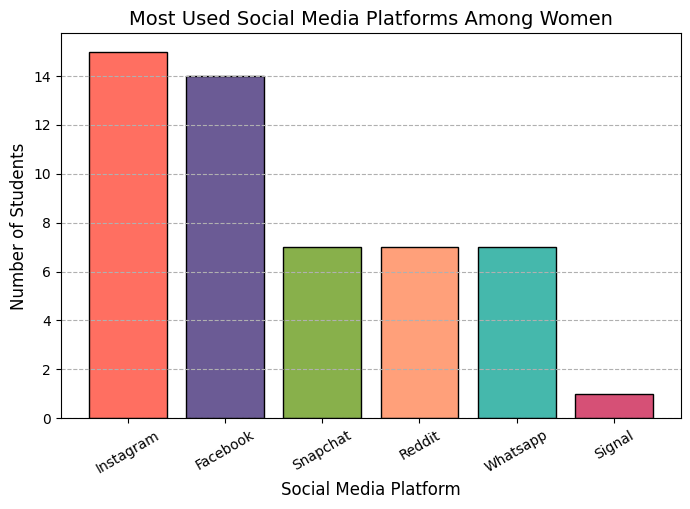

In [38]:
women_df = df[df["Gender"] == "Female"]
womensocial_med = women_df["Social Media"].value_counts()
colors = ["#FF6F61","#6B5B95","#88B04B","#FFA07A","#45B8AC","#D65076","#EFC050"]
plt.figure(figsize=(8,5))
plt.bar(womensocial_med.index, womensocial_med.values, color=colors,edgecolor="black")
plt.xlabel("Social Media Platform", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.title("Most Used Social Media Platforms Among Women", fontsize=14)
plt.xticks(rotation=30, fontsize=10)
plt.grid(axis="y", linestyle="--")
plt.yticks(fontsize=10)
plt.show()

## Social Media usage among Men

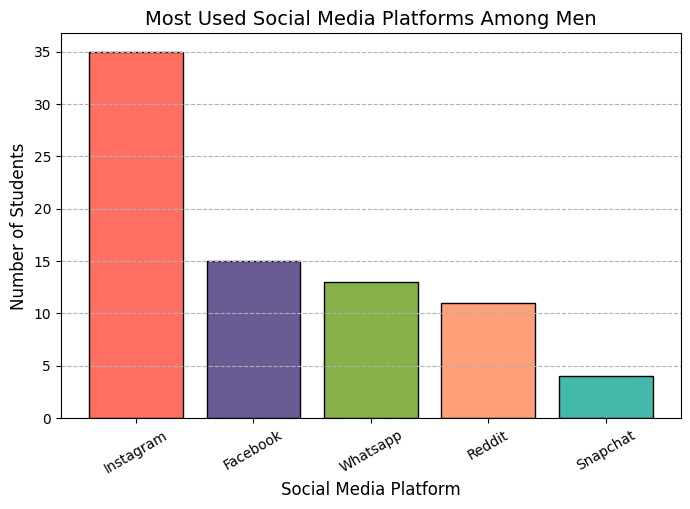

In [39]:
men_df = df[df["Gender"] == "Male"]
mensocial_med = men_df["Social Media"].value_counts()
colors = ["#FF6F61","#6B5B95","#88B04B","#FFA07A","#45B8AC","#D65076","#EFC050"]
plt.figure(figsize=(8,5))
#plt.bar(mensocial_med.index, mensocial_med.values, color=['c', 'lightcoral', 'skyblue', 'coral', 'orange'])
plt.bar(mensocial_med.index, mensocial_med.values, color=colors,edgecolor="black")
plt.xlabel("Social Media Platform", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.title("Most Used Social Media Platforms Among Men", fontsize=14)
plt.xticks(rotation=30, fontsize=10)
plt.grid(axis="y", linestyle="--")
plt.yticks(fontsize=10)
plt.show()


# Phone Ownership Distribution

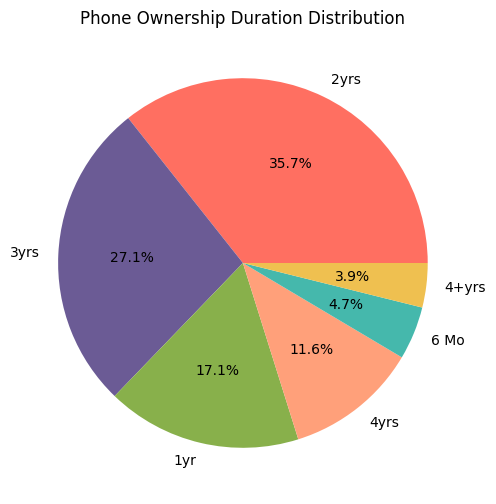

In [40]:
ownership_count= df["Using Since"].value_counts()
colors = ["#FF6F61","#6B5B95","#88B04B","#FFA07A","#45B8AC","#EFC050","#D65076"]

plt.figure(figsize=(6,6))
plt.pie(ownership_count,labels=ownership_count.index,autopct='%1.1f%%',colors=colors)
plt.title("Phone Ownership Duration Distribution")
plt.show()

## Phone Ownership among Students

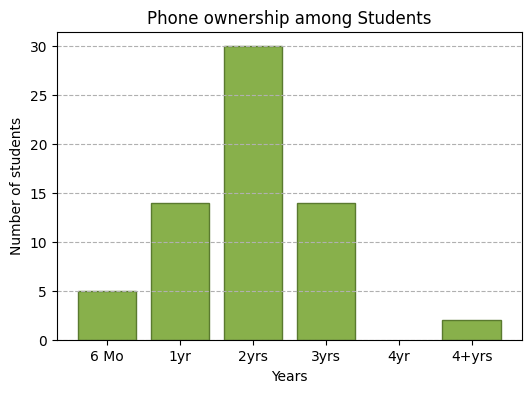

In [41]:
stud_phone=students_df["Using Since"].value_counts()
ordered = ["6 Mo","1yr", "2yrs", "3yrs", "4yr", "4+yrs"]
stud_phone=stud_phone.reindex(ordered)
plt.figure(figsize=(6,4))
plt.bar(stud_phone.index,stud_phone.values, color='#88B04B',edgecolor="#5A7A2F")

plt.xlabel("Years")
plt.ylabel("Number of students")
plt.title("Phone ownership among Students")
plt.grid(axis="y",linestyle="--")
plt.show()

## Phone Ownership Percentage in Students

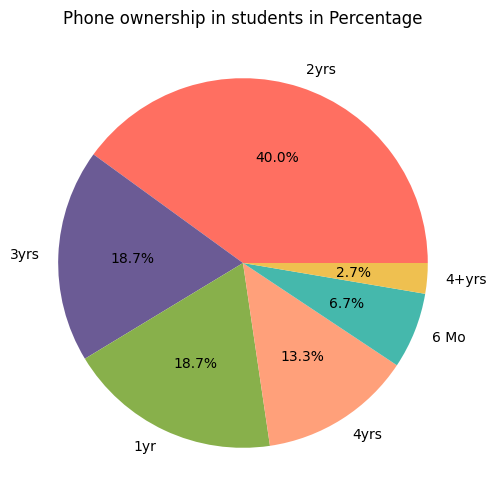

In [42]:
stud_phone= students_df["Using Since"].value_counts()
colors = ["#FF6F61","#6B5B95","#88B04B","#FFA07A","#45B8AC","#EFC050","#D65076"]
plt.figure(figsize=(6,6))
plt.pie(stud_phone,labels=stud_phone.index,autopct='%1.1f%%',colors=colors)
plt.title("Phone ownership in students in Percentage")
plt.show()

# Second Phone Ownership

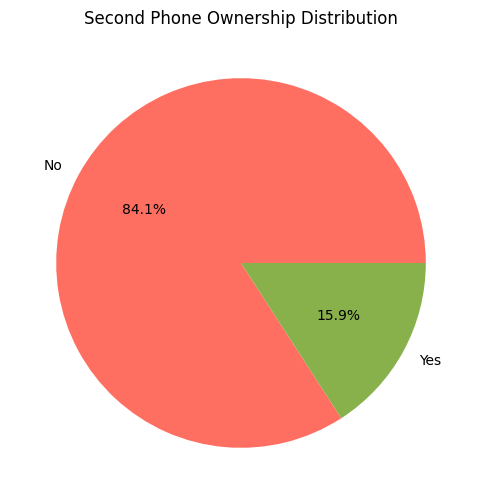

In [43]:
ownership_counts = df["Secondphone"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(ownership_counts, labels=ownership_counts.index, autopct='%1.1f%%', colors=['#FF6F61','#88B04B'])
plt.title("Second Phone Ownership Distribution")
plt.show()

## Second Phone Ownership among Students

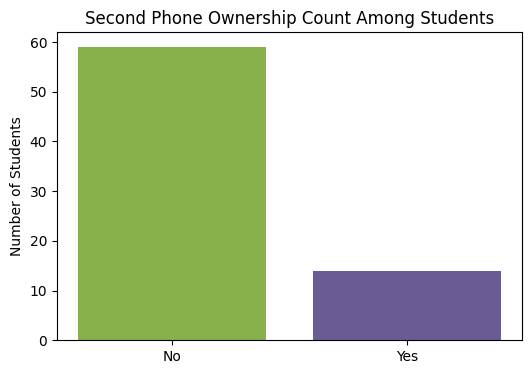

In [44]:
studentsecond= students_df["Secondphone"].value_counts()
plt.figure(figsize=(6,4))
plt.bar(studentsecond.index, studentsecond.values, color=['#88B04B','#6B5B95'])
plt.ylabel("Number of Students")
plt.title("Second Phone Ownership Count Among Students")
plt.show()


# Primary Telecom Operator

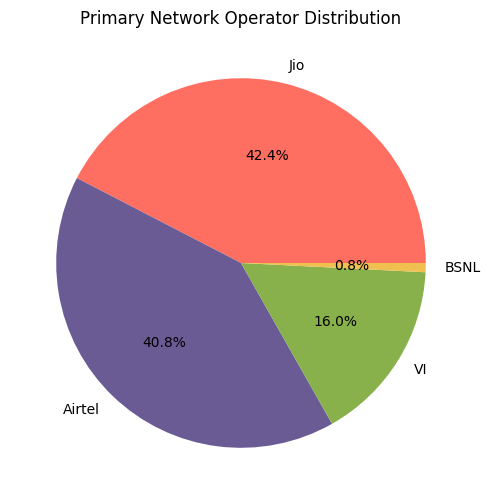

In [45]:
ownership_counts = df["Primary SIM"].value_counts()
colors = ["#FF6F61","#6B5B95","#88B04B","#EFC050"]
plt.figure(figsize=(6,6))

plt.pie(ownership_counts, labels=ownership_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Primary Network Operator Distribution")
plt.show()

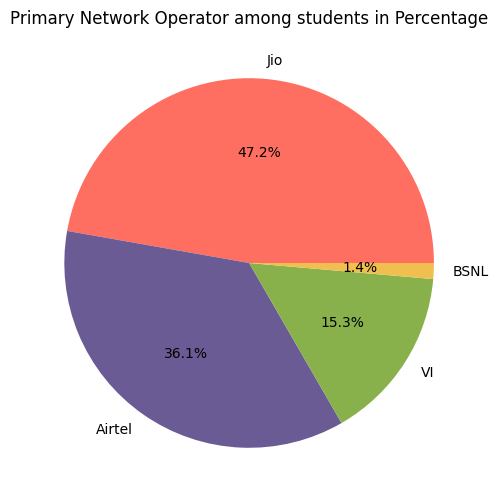

In [46]:
stud_phone_ownership= students_df["Primary SIM"].value_counts()
colors = ["#FF6F61","#6B5B95","#88B04B","#EFC050"]
plt.figure(figsize=(6,6))
plt.pie(stud_phone_ownership,labels=stud_phone_ownership.index,autopct='%1.1f%%',colors=colors)
plt.title("Primary Network Operator among students in Percentage")
plt.show()

# Preffered type of Internet Connection

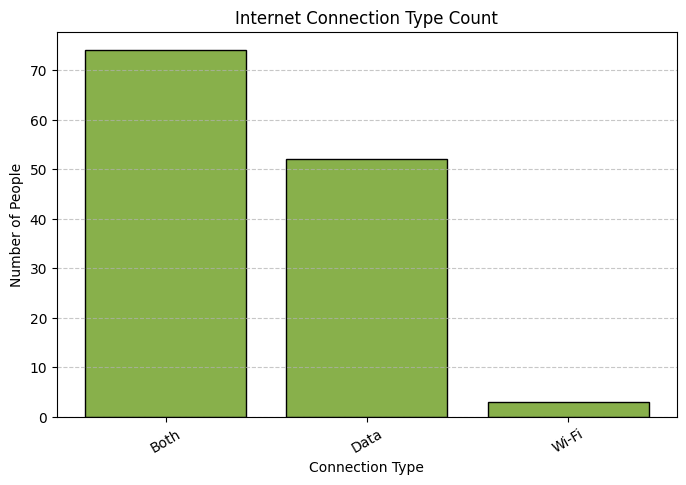

In [47]:
connection = df["Connection"].value_counts()
plt.figure(figsize=(8,5))
plt.bar(connection.index, connection.values, color="#88B04B",edgecolor="black")
plt.xlabel("Connection Type")
plt.ylabel("Number of People")
plt.title("Internet Connection Type Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=30)
plt.show()

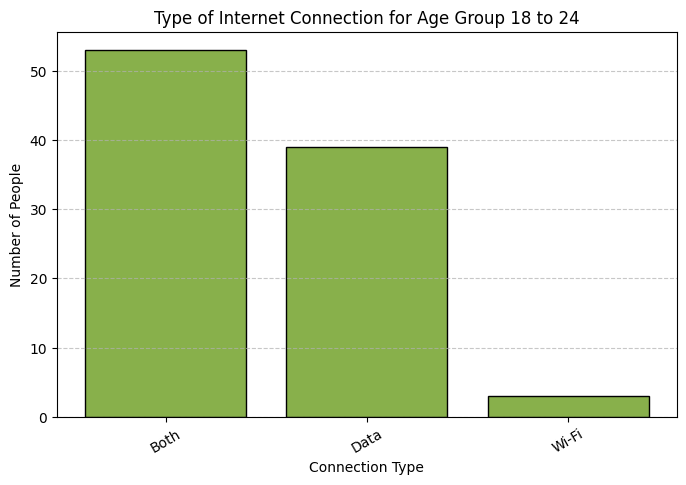

In [48]:
Age_net = df[df["Age"] == "18 to 24"]
connection = Age_net["Connection"].value_counts()
#ordered = ["1 to 2 Hrs", "3 to 4 Hrs", "5 to 6 Hrs", "7 to 8 Hrs", "8+ Hrs"]
plt.figure(figsize=(8,5))
plt.bar(connection.index, connection.values, color="#88B04B",edgecolor="black")
plt.xlabel("Connection Type")
plt.ylabel("Number of People")
plt.title("Type of Internet Connection for Age Group 18 to 24")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=30)
plt.show()

# Monthly Spending on Mobile App Services

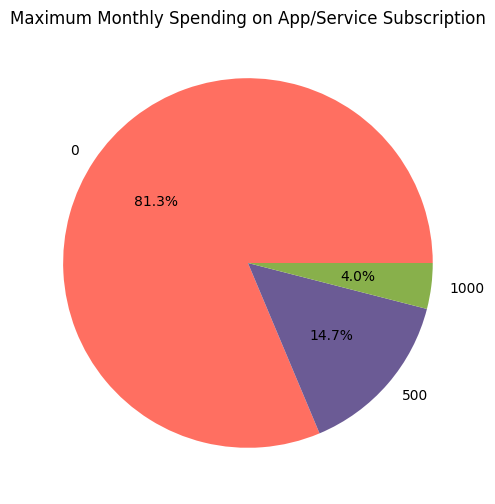

In [49]:
subscription= students_df["Subscription"].value_counts()
colors = ["#FF6F61","#6B5B95","#88B04B","#EFC050"]
plt.figure(figsize=(6,6))
plt.pie(subscription,labels=subscription.index,autopct='%1.1f%%',colors=colors)
plt.title("Maximum Monthly Spending on App/Service Subscription")
plt.show()

# Preffered Internet Browser

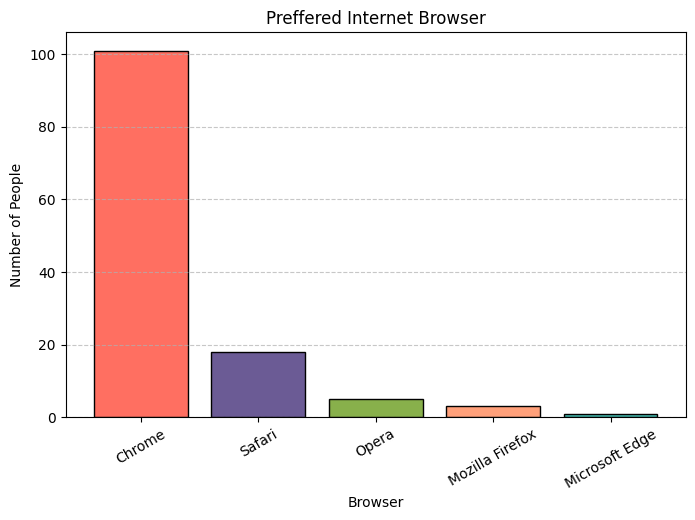

In [50]:
browser =df["Browser"].value_counts()
colors = ["#FF6F61","#6B5B95","#88B04B","#FFA07A","#45B8AC","#D65076","#EFC050"]
plt.figure(figsize=(8,5))
plt.bar(browser.index, browser.values, color=colors,edgecolor="black")
plt.xlabel("Browser")
plt.ylabel("Number of People")
plt.title("Preffered Internet Browser")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=30)
plt.show()

# Insights from EDA

We have 60.55% men and 39.5% women, here we have  Worker and Working Professional both on (11.6% ) followed by Students (58.1%)
We have 18 to 24 Age Group people highest having highest shares,73.6%, 19.4%  for 25 to 34 Age group.
Highest profession in 18 tp 24 Age Group is Students, second profession is Working Professional, for age group 25 to 34 highest profession is Worker and homemaker is second profession.  

Most preferred Phone brand is Xiaomi , Apple and Samsung are on Second and third position respectively. Least preferred Brand is Google. There were also Tecno, Infinix, Itel and Lava but no one opted for them. Most preferred brand among men was apple while for women it was Xiaomi and Vivo. Students prefer Xiaomi, Apple, and Samsung most. Reason behind Xiaomi being the Most preffered brand could be them offering better Specifications at lower price, For Apple it could be the ease of use and it's premium offering. For Samsung, It's preffered by those who are using Samsung Since very long and become used to it's System Apps & Settings. 

Instagram (38.8%) is the most popular social media platform, followed by Facebook (22.5%) and WhatsApp (15.5%).
Among students, Reddit is the second most preferred platform, with Instagram being the highest. Reddit has most of it's users from Student Category, In reddit, we have various subreddits where like minded people can interact with each other to help and discuss on issues they face. This might be the reason Students using reddit to benefit themeselve from it.


35.7% of users have been using their phone for 2 years, followed by 27.1% using it for 3 years and 17.1% for one year. Among students, the highest percentage (40%) have been using their phone for 2 years, while 18.7% each have been using it for 1 year and 3 years. This could be because our data consist majority of people aged between 18-25, which show they got new phone from parents or they tend to change their smartphone more frequently compared to older users who tend to use same phone for 4-5 years.


A vast majority (81.3%) of users do not spend money on app subscriptions like Netflix, Amazon Prime, or YouTube Premium. Only 14.7% purchase subscriptions, while a small percentage (4%) spend up to ₹1000 per month on subscriptions. This show a majority of users are not willing to pay for app subscriptions or they are relying on pirated content for entertainment.

Google Chrome is the most widely used browser, with over 100 users out of 129 choosing it. It shows that users are more comfortable with Google Chrome, also it is Default Browser in Android Devices from different Manufacturers.


Reliance Jio(42.4%) and Bharti Airtel (40.8%)are 2 Mobile Network providers having Large share in Mobile market, Reason behind could be competitive pricing and better network coverage across county. 